In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error

import plotly as py
import plotly.io as pio
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# Change default background color for all visualizations
layout=go.Layout(paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='rgba(250,250,250,0.8)')
fig = go.Figure(layout=layout)
templated_fig = pio.to_templated(fig)
pio.templates['my_template'] = templated_fig.layout.template
pio.templates.default = 'my_template'

# Show charts when running kernel
init_notebook_mode(connected=True)


## Load Data

In [2]:
train = pd.read_csv('/home/ashioyajotham/cryptocurrency-closing-price-prediction/Train.csv')
test = pd.read_csv('/home/ashioyajotham/cryptocurrency-closing-price-prediction/Test.csv')

In [3]:
pd.set_option('display.max_columns', None)
train.head()


,id,asset_id,open,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,reddit_posts_score,reddit_comments,reddit_comments_score,tweets,tweet_spam,tweet_followers,tweet_quotes,tweet_retweets,tweet_replies,tweet_favorites,tweet_sentiment1,tweet_sentiment2,tweet_sentiment3,tweet_sentiment4,tweet_sentiment5,tweet_sentiment_impact1,tweet_sentiment_impact2,tweet_sentiment_impact3,tweet_sentiment_impact4,tweet_sentiment_impact5,social_score,average_sentiment,news,price_score,social_impact_score,correlation_rank,galaxy_score,volatility,market_cap_rank,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,medium,youtube,social_volume,percent_change_24h,market_cap_global,close
0,ID_322qz6,1,9422.849081,9428.490628,9422.849081,7.131986e+08,1.737635e+11,1689.0,817.0,55.0,105.0,61.0,271.0,3420.0,1671.0,11675867.0,39.0,1343.0,448.0,2237.0,124.0,330.0,331.0,2515.0,120.0,506133.0,1326610.0,1159677.0,8406185.0,281329.0,11681999.0,3.6,69.0,2.7,3.6,3.3,66.0,0.007118,1.0,606.0,2.0,1.0,1.0,2.0,5.0,4422,1.434516,2.818066e+11,9428.279323
1,ID_3239o9,1,7985.359278,7992.059917,7967.567267,4.004755e+08,1.426942e+11,920.0,544.0,20.0,531.0,103.0,533.0,1491.0,242.0,5917814.0,195.0,1070.0,671.0,3888.0,1.0,52.0,315.0,1100.0,23.0,1320.0,381117.0,1706376.0,3754815.0,80010.0,5924770.0,3.7,1.0,2.0,2.0,1.0,43.5,0.009419,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2159,-2.459507,2.126897e+11,7967.567267
2,ID_323J9k,1,49202.033778,49394.593518,49068.057046,3.017729e+09,9.166977e+11,1446.0,975.0,72.0,1152.0,187.0,905.0,9346.0,4013.0,47778746.0,104.0,2014.0,1099.0,11476.0,331.0,923.0,864.0,6786.0,442.0,9848462.0,5178557.0,2145663.0,25510267.0,5110490.0,47796942.0,3.7,22.0,3.1,3.0,3.3,65.5,0.013530,1.0,692.0,3.0,1.0,1.0,NaN,NaN,10602,4.942448,1.530712e+12,49120.738484
3,ID_323y5P,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,424.0,268.0,443.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,285,NaN,NaN,NaN
4,ID_324kJH,1,10535.737119,10535.737119,10384.798216,1.150053e+09,1.921183e+11,1012.0,638.0,24.0,42.0,50.0,173.0,3262.0,1652.0,14422172.0,21.0,511.0,190.0,2284.0,86.0,280.0,443.0,2284.0,169.0,311017.0,1977833.0,731277.0,10964321.0,440730.0,14426405.0,3.7,22.0,4.7,3.8,4.4,83.0,0.010332,1.0,749.0,2.0,1.0,1.0,NaN,2.0,3996,2.609576,3.386925e+11,10384.798216


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12632 entries, 0 to 12631
Data columns (total 49 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       12632 non-null  object 
 1   asset_id                 12632 non-null  int64  
 2   open                     8617 non-null   float64
 3   high                     8617 non-null   float64
 4   low                      8617 non-null   float64
 5   volume                   8605 non-null   float64
 6   market_cap               8379 non-null   float64
 7   url_shares               8575 non-null   float64
 8   unique_url_shares        8575 non-null   float64
 9   reddit_posts             12391 non-null  float64
 10  reddit_posts_score       12391 non-null  float64
 11  reddit_comments          12402 non-null  float64
 12  reddit_comments_score    12402 non-null  float64
 13  tweets                   8584 non-null   float64
 14  tweet_spam            

## Handling Missing Data

In [5]:
train.isna().sum()

id                            0
asset_id                      0
open                       4015
high                       4015
low                        4015
volume                     4027
market_cap                 4253
url_shares                 4057
unique_url_shares          4057
reddit_posts                241
reddit_posts_score          241
reddit_comments             230
reddit_comments_score       230
tweets                     4048
tweet_spam                 4048
tweet_followers            4058
tweet_quotes               4058
tweet_retweets             4058
tweet_replies              4058
tweet_favorites            4058
tweet_sentiment1           4048
tweet_sentiment2           4048
tweet_sentiment3           4048
tweet_sentiment4           4048
tweet_sentiment5           4048
tweet_sentiment_impact1    4048
tweet_sentiment_impact2    4048
tweet_sentiment_impact3    4048
tweet_sentiment_impact4    4048
tweet_sentiment_impact5    4048
social_score               4048
average_

In [6]:
# Dropping the columns with missing values
train.drop(['asset_id','volume_24h_rank','social_volume_24h_rank', 'social_volume', 'market_cap_global',
'correlation_rank','social_score_24h_rank', 'social_impact_score','galaxy_score', 'url_shares', 'unique_url_shares',
'market_cap_rank', 'percent_change_24h', 'percent_change_24h_rank','market_cap_global'], axis=1, inplace=True)
train.head()

,id,open,high,low,volume,market_cap,reddit_posts,reddit_posts_score,reddit_comments,reddit_comments_score,tweets,tweet_spam,tweet_followers,tweet_quotes,tweet_retweets,tweet_replies,tweet_favorites,tweet_sentiment1,tweet_sentiment2,tweet_sentiment3,tweet_sentiment4,tweet_sentiment5,tweet_sentiment_impact1,tweet_sentiment_impact2,tweet_sentiment_impact3,tweet_sentiment_impact4,tweet_sentiment_impact5,social_score,average_sentiment,news,price_score,volatility,medium,youtube,close
0,ID_322qz6,9422.849081,9428.490628,9422.849081,7.131986e+08,1.737635e+11,55.0,105.0,61.0,271.0,3420.0,1671.0,11675867.0,39.0,1343.0,448.0,2237.0,124.0,330.0,331.0,2515.0,120.0,506133.0,1326610.0,1159677.0,8406185.0,281329.0,11681999.0,3.6,69.0,2.7,0.007118,2.0,5.0,9428.279323
1,ID_3239o9,7985.359278,7992.059917,7967.567267,4.004755e+08,1.426942e+11,20.0,531.0,103.0,533.0,1491.0,242.0,5917814.0,195.0,1070.0,671.0,3888.0,1.0,52.0,315.0,1100.0,23.0,1320.0,381117.0,1706376.0,3754815.0,80010.0,5924770.0,3.7,1.0,2.0,0.009419,NaN,NaN,7967.567267
2,ID_323J9k,49202.033778,49394.593518,49068.057046,3.017729e+09,9.166977e+11,72.0,1152.0,187.0,905.0,9346.0,4013.0,47778746.0,104.0,2014.0,1099.0,11476.0,331.0,923.0,864.0,6786.0,442.0,9848462.0,5178557.0,2145663.0,25510267.0,5110490.0,47796942.0,3.7,22.0,3.1,0.013530,NaN,NaN,49120.738484
3,ID_323y5P,NaN,NaN,NaN,NaN,NaN,17.0,424.0,268.0,443.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ID_324kJH,10535.737119,10535.737119,10384.798216,1.150053e+09,1.921183e+11,24.0,42.0,50.0,173.0,3262.0,1652.0,14422172.0,21.0,511.0,190.0,2284.0,86.0,280.0,443.0,2284.0,169.0,311017.0,1977833.0,731277.0,10964321.0,440730.0,14426405.0,3.7,22.0,4.7,0.010332,NaN,2.0,10384.798216


In [7]:
train.isnull().sum()

id                            0
open                       4015
high                       4015
low                        4015
volume                     4027
market_cap                 4253
reddit_posts                241
reddit_posts_score          241
reddit_comments             230
reddit_comments_score       230
tweets                     4048
tweet_spam                 4048
tweet_followers            4058
tweet_quotes               4058
tweet_retweets             4058
tweet_replies              4058
tweet_favorites            4058
tweet_sentiment1           4048
tweet_sentiment2           4048
tweet_sentiment3           4048
tweet_sentiment4           4048
tweet_sentiment5           4048
tweet_sentiment_impact1    4048
tweet_sentiment_impact2    4048
tweet_sentiment_impact3    4048
tweet_sentiment_impact4    4048
tweet_sentiment_impact5    4048
social_score               4048
average_sentiment          4048
news                       4076
price_score                4048
volatili

In [8]:
# Imputing the missing values with the mean of the column
train['open'] = train['open'].fillna(train['open'].mean())
train['high'] = train['high'].fillna(train['high'].mean())
train['low'] = train['low'].fillna(train['low'].mean())
train['close'] = train['close'].fillna(train['close'].mean())
train['volume'] = train['volume'].fillna(train['volume'].mean())
train['market_cap'] = train['market_cap'].fillna(train['market_cap'].mean())
train['price_score'] = train['price_score'].fillna(train['price_score'].mean())

In [9]:
# create a function to replace missing values with 0
def replace_missing_values(df):
    df['reddit_posts'] = df['reddit_posts'].fillna(0)
    df['reddit_comments'] = df['reddit_comments'].fillna(0)
    df['reddit_posts_score'] = df['reddit_posts_score'].fillna(0)
    df['reddit_comments_score'] = df['reddit_comments_score'].fillna(0)
    df['tweets'] = df['tweets'].fillna(0)
    df['tweet_spam'] = df['tweet_spam'].fillna(0)
    df['tweet_followers'] = df['tweet_followers'].fillna(0)
    df['tweet_quotes'] = df['tweet_quotes'].fillna(0)
    df['tweet_retweets'] = df['tweet_retweets'].fillna(0)
    df['tweet_replies'] = df['tweet_replies'].fillna(0)
    df['tweet_favorites'] = df['tweet_favorites'].fillna(0)
    df['tweet_sentiment1'] = df['tweet_sentiment1'].fillna(0)
    df['tweet_sentiment2'] = df['tweet_sentiment2'].fillna(0)
    df['tweet_sentiment3'] = df['tweet_sentiment3'].fillna(0)
    df['tweet_sentiment4'] = df['tweet_sentiment4'].fillna(0)
    df['tweet_sentiment5'] = df['tweet_sentiment5'].fillna(0)
    df['tweet_sentiment_impact1'] = df['tweet_sentiment_impact1'].fillna(0)
    df['tweet_sentiment_impact2'] = df['tweet_sentiment_impact2'].fillna(0)
    df['tweet_sentiment_impact3'] = df['tweet_sentiment_impact3'].fillna(0)
    df['tweet_sentiment_impact4'] = df['tweet_sentiment_impact4'].fillna(0)
    df['tweet_sentiment_impact5'] = df['tweet_sentiment_impact5'].fillna(0)
    df['social_score'] = df['social_score'].fillna(0)
    df['average_sentiment'] = df['average_sentiment'].fillna(0)
    df['news'] = df['news'].fillna(0)
    df['volatility'] = df['volatility'].fillna(0)
    df['medium'] = df['medium'].fillna(0)
    df['youtube'] = df['youtube'].fillna(0)
    return df
replace_missing_values(train)

,id,open,high,low,volume,market_cap,reddit_posts,reddit_posts_score,reddit_comments,reddit_comments_score,tweets,tweet_spam,tweet_followers,tweet_quotes,tweet_retweets,tweet_replies,tweet_favorites,tweet_sentiment1,tweet_sentiment2,tweet_sentiment3,tweet_sentiment4,tweet_sentiment5,tweet_sentiment_impact1,tweet_sentiment_impact2,tweet_sentiment_impact3,tweet_sentiment_impact4,tweet_sentiment_impact5,social_score,average_sentiment,news,price_score,volatility,medium,youtube,close
0,ID_322qz6,9422.849081,9428.490628,9422.849081,7.131986e+08,1.737635e+11,55.0,105.0,61.0,271.0,3420.0,1671.0,11675867.0,39.0,1343.0,448.0,2237.0,124.0,330.0,331.0,2515.0,120.0,506133.0,1326610.0,1159677.0,8406185.0,281329.0,11681999.0,3.6,69.0,2.700000,0.007118,2.0,5.0,9428.279323
1,ID_3239o9,7985.359278,7992.059917,7967.567267,4.004755e+08,1.426942e+11,20.0,531.0,103.0,533.0,1491.0,242.0,5917814.0,195.0,1070.0,671.0,3888.0,1.0,52.0,315.0,1100.0,23.0,1320.0,381117.0,1706376.0,3754815.0,80010.0,5924770.0,3.7,1.0,2.000000,0.009419,0.0,0.0,7967.567267
2,ID_323J9k,49202.033778,49394.593518,49068.057046,3.017729e+09,9.166977e+11,72.0,1152.0,187.0,905.0,9346.0,4013.0,47778746.0,104.0,2014.0,1099.0,11476.0,331.0,923.0,864.0,6786.0,442.0,9848462.0,5178557.0,2145663.0,25510267.0,5110490.0,47796942.0,3.7,22.0,3.100000,0.013530,0.0,0.0,49120.738484
3,ID_323y5P,15504.816128,15559.484568,15449.591187,1.300724e+09,2.826010e+11,17.0,424.0,268.0,443.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.002924,0.000000,0.0,0.0,15507.395867
4,ID_324kJH,10535.737119,10535.737119,10384.798216,1.150053e+09,1.921183e+11,24.0,42.0,50.0,173.0,3262.0,1652.0,14422172.0,21.0,511.0,190.0,2284.0,86.0,280.0,443.0,2284.0,169.0,311017.0,1977833.0,731277.0,10964321.0,440730.0,14426405.0,3.7,22.0,4.700000,0.010332,0.0,2.0,10384.798216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12627,ID_zybd4H,15504.816128,15559.484568,15449.591187,1.300724e+09,2.826010e+11,2.0,61.0,138.0,161.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.002924,0.000000,0.0,0.0,15507.395867
12628,ID_zydeys,7294.506136,7306.701928,7292.729876,3.816704e+08,1.322473e+11,16.0,217.0,39.0,156.0,1501.0,241.0,10909376.0,9.0,170.0,44.0,292.0,35.0,51.0,358.0,973.0,84.0,163376.0,304833.0,775658.0,9213680.0,452344.0,10910586.0,3.7,2.0,3.300000,0.019912,0.0,0.0,7303.640282
12629,ID_zyfj4W,8811.121632,8832.560173,8754.602574,2.412260e+09,1.621298e+11,74.0,249.0,60.0,107.0,4852.0,513.0,14878543.0,92.0,1127.0,454.0,3252.0,144.0,203.0,952.0,3101.0,452.0,617875.0,656816.0,2617007.0,10307241.0,684529.0,14885477.0,3.7,44.0,2.800000,0.020715,1.0,2.0,8828.440234
12630,ID_zz5eGB,9661.514681,9662.196605,9645.133934,9.861517e+08,1.774933e+11,39.0,81.0,43.0,122.0,3915.0,675.0,14439095.0,153.0,871.0,274.0,3343.0,74.0,188.0,671.0,2691.0,291.0,278732.0,360131.0,1733775.0,10881941.0,1189157.0,14445315.0,3.8,25.0,3.000000,0.012411,0.0,9.0,9658.204385


In [10]:
train.isnull().sum()

id                         0
open                       0
high                       0
low                        0
volume                     0
market_cap                 0
reddit_posts               0
reddit_posts_score         0
reddit_comments            0
reddit_comments_score      0
tweets                     0
tweet_spam                 0
tweet_followers            0
tweet_quotes               0
tweet_retweets             0
tweet_replies              0
tweet_favorites            0
tweet_sentiment1           0
tweet_sentiment2           0
tweet_sentiment3           0
tweet_sentiment4           0
tweet_sentiment5           0
tweet_sentiment_impact1    0
tweet_sentiment_impact2    0
tweet_sentiment_impact3    0
tweet_sentiment_impact4    0
tweet_sentiment_impact5    0
social_score               0
average_sentiment          0
news                       0
price_score                0
volatility                 0
medium                     0
youtube                    0
close         

## Visualization

In [11]:
# Copy the dataset with OHLCV data
train_ohlc = train.copy()

In [12]:
train_ohlc = train_ohlc[['open', 'high', 'low', 'close', 'volume', 'market_cap', 'volatility']]
train_ohlc.head()

,open,high,low,close,volume,market_cap,volatility
0,9422.849081,9428.490628,9422.849081,9428.279323,7.131986e+08,1.737635e+11,0.007118
1,7985.359278,7992.059917,7967.567267,7967.567267,4.004755e+08,1.426942e+11,0.009419
2,49202.033778,49394.593518,49068.057046,49120.738484,3.017729e+09,9.166977e+11,0.013530
3,15504.816128,15559.484568,15449.591187,15507.395867,1.300724e+09,2.826010e+11,0.000000
4,10535.737119,10535.737119,10384.798216,10384.798216,1.150053e+09,1.921183e+11,0.010332


<Figure size 1000x800 with 0 Axes>

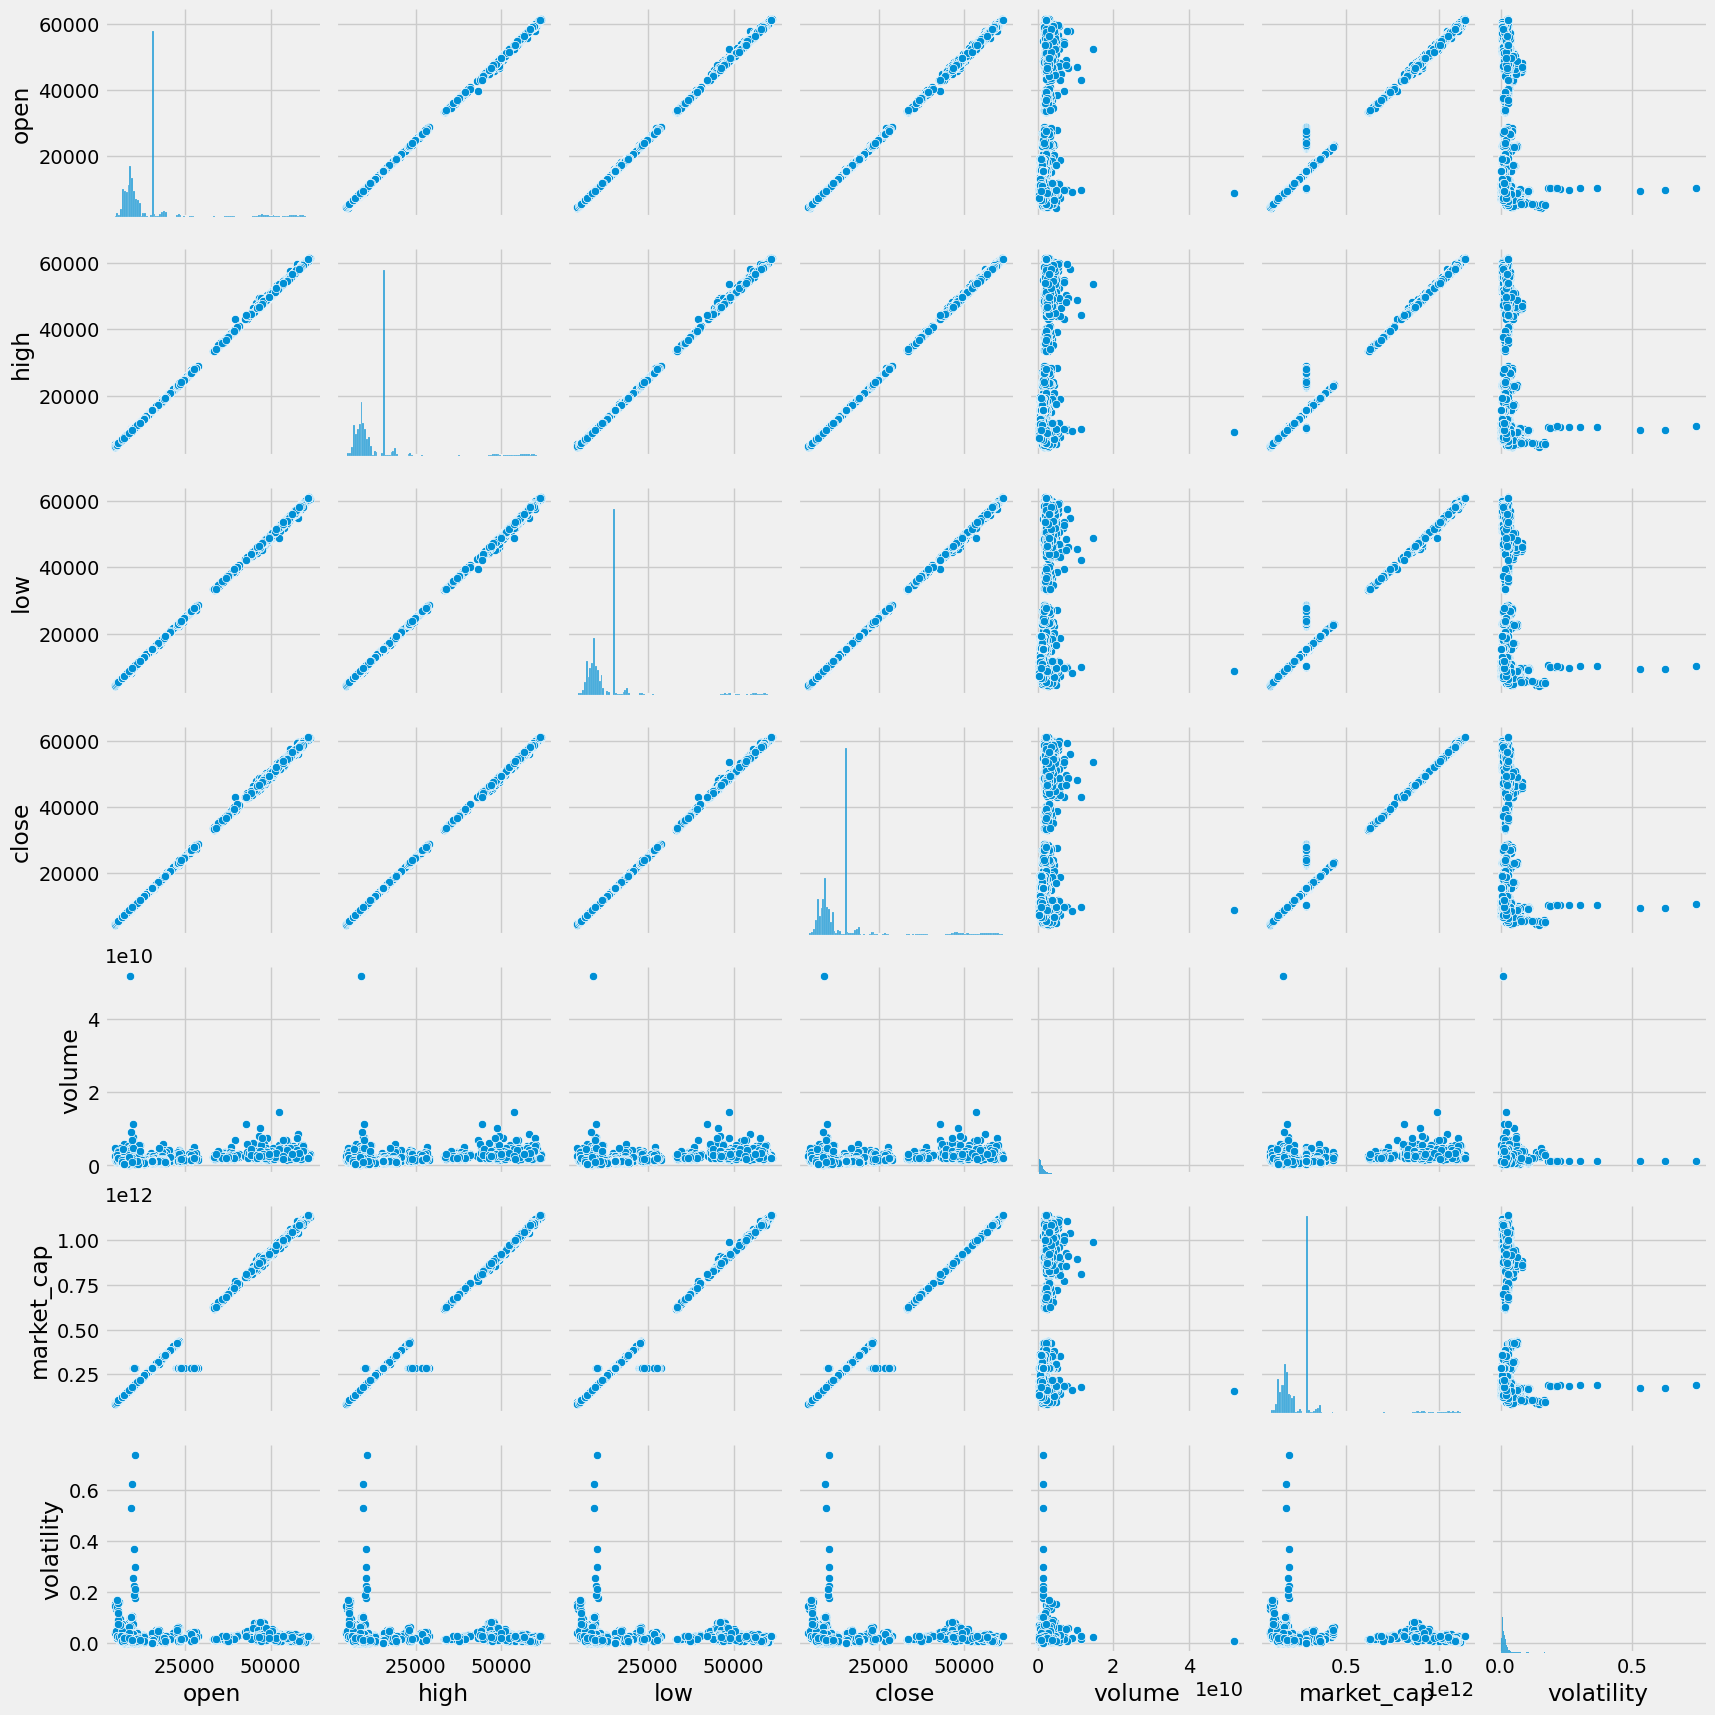

In [13]:
# Pairplot of the OHLCV data
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 8))
sns.pairplot(train_ohlc)
plt.show();

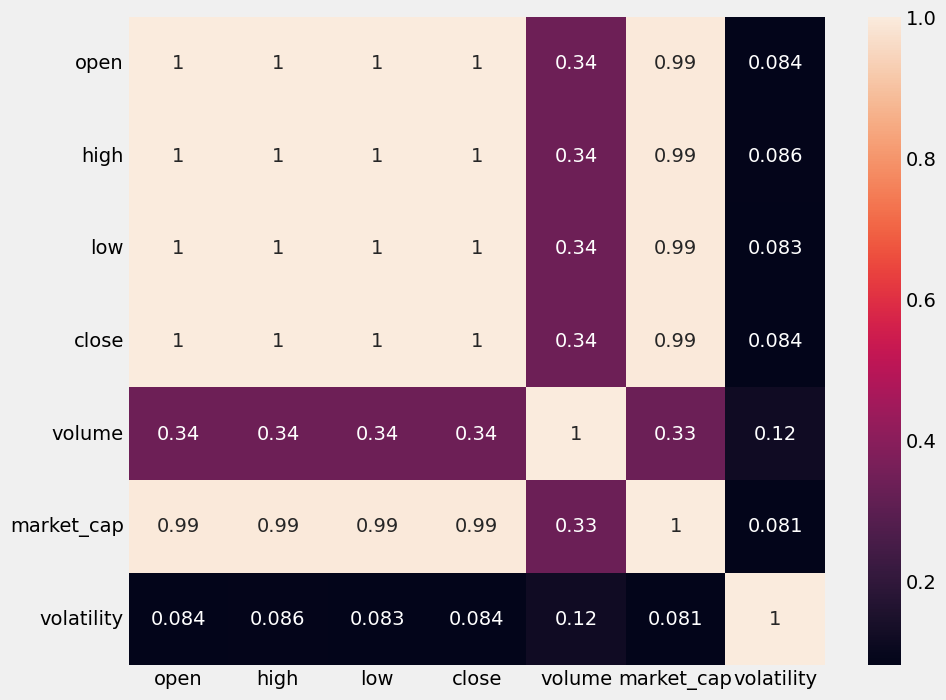

In [14]:
# Correlation matrix of the OHLCV data
plt.figure(figsize=(10, 8))
sns.heatmap(train_ohlc.corr(),annot=True);

* From the heatmap, we can note there is some mixture of correlation

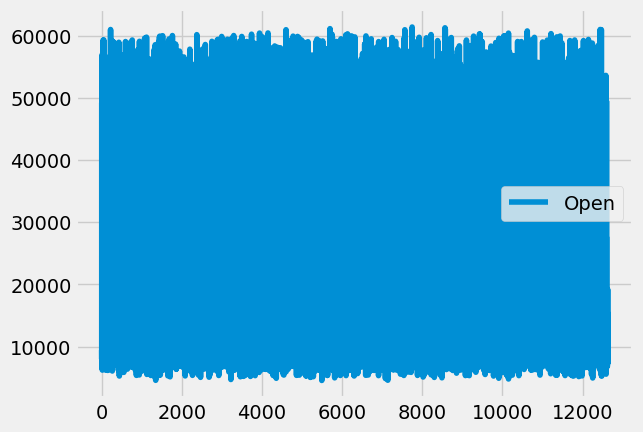

In [15]:
# Plotting the OHLCV data
plt.plot(train_ohlc['open'], label='Open')
plt.legend();

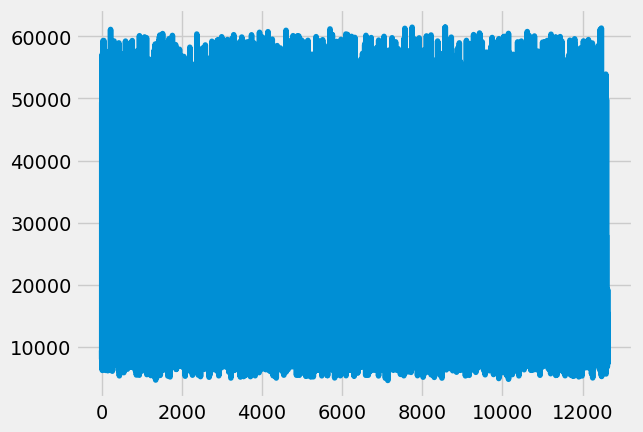

In [16]:
plt.plot(train_ohlc['high'], label='High');

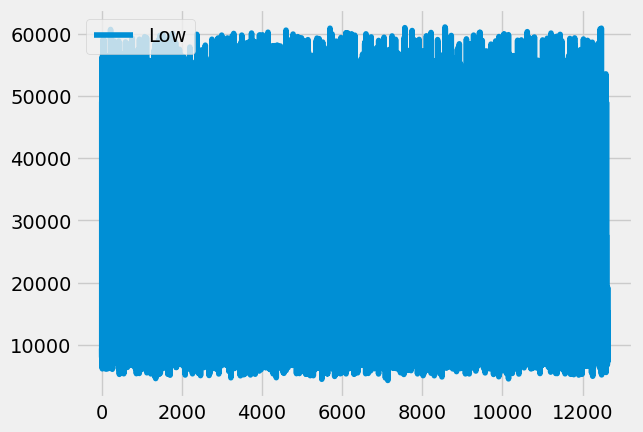

In [17]:
plt.plot(train_ohlc['low'], label='Low')
plt.legend(loc='upper left');

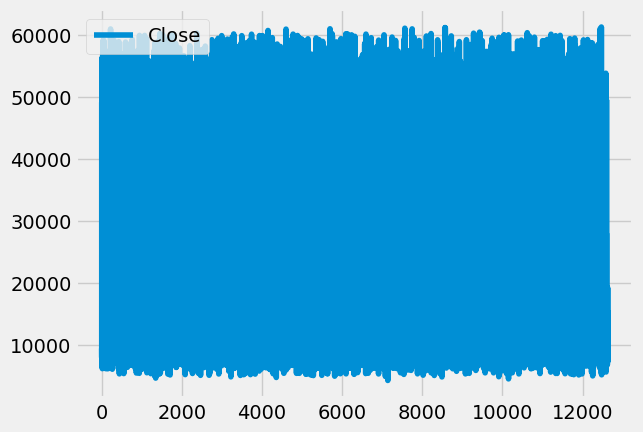

In [18]:
plt.plot(train_ohlc['close'], label='Close')
plt.legend(loc='upper left');

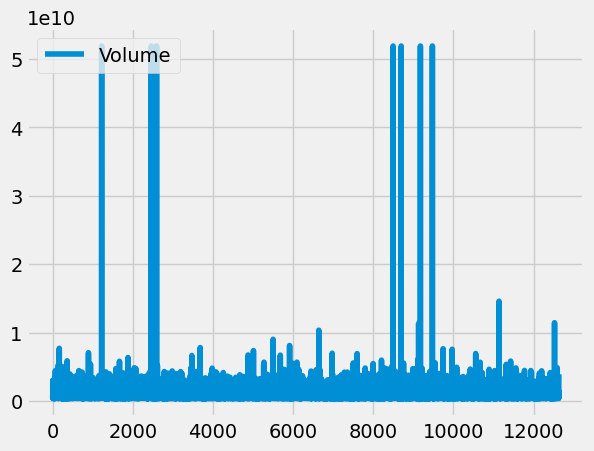

In [19]:
plt.plot(train_ohlc['volume'], label='Volume')
plt.legend(loc='upper left');

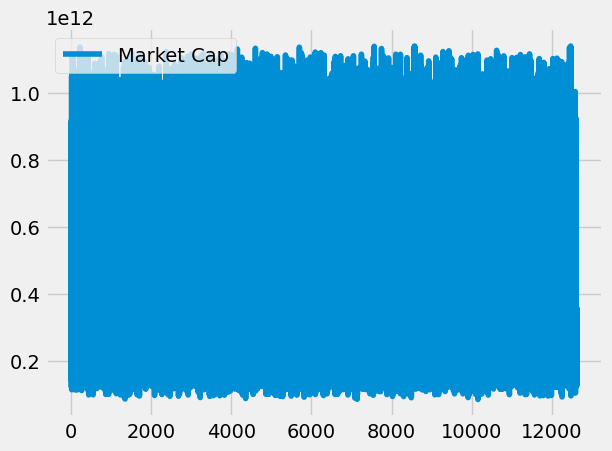

In [20]:
plt.plot(train_ohlc['market_cap'], label='Market Cap')
plt.legend(loc='upper left');

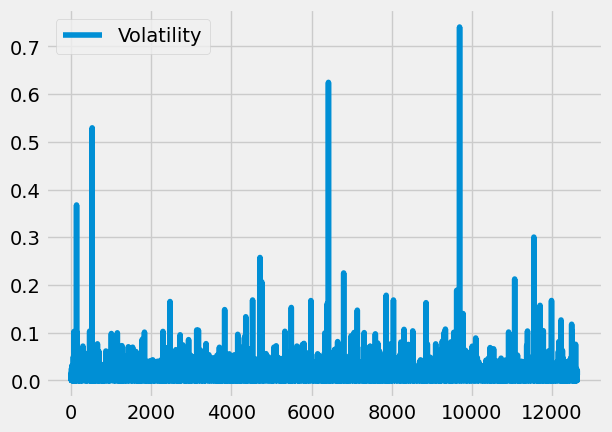

In [21]:
plt.plot(train_ohlc['volatility'], label='Volatility')
plt.legend(loc='upper left');

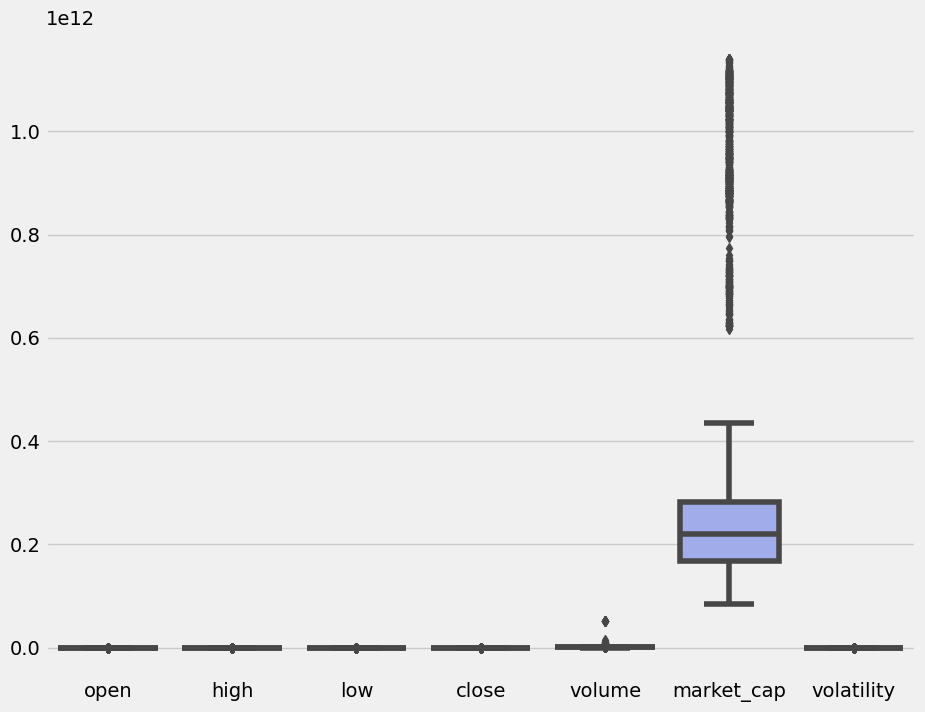

In [22]:
# A box plot of the OHLCV data
plt.figure(figsize=(10, 8))
sns.boxplot(data=train_ohlc);

<Figure size 640x480 with 0 Axes>

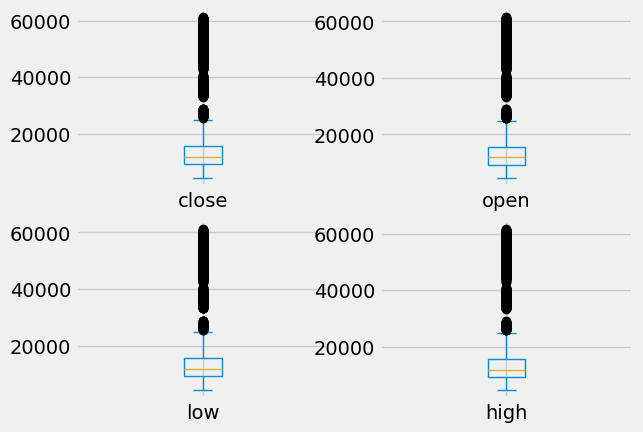

In [23]:
list_num = ["close", "open", "low", "high"]

fig = plt.figure()
train_ohlc[list_num].plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show();

In [24]:
train_ohlc.describe()

,open,high,low,close,volume,market_cap,volatility
count,12632.000000,12632.000000,12632.000000,12632.000000,1.263200e+04,1.263200e+04,12632.000000
mean,15504.816128,15559.484568,15449.591187,15507.395867,1.300724e+09,2.826010e+11,0.010404
std,11650.080611,11720.610486,11581.481856,11655.610279,1.412912e+09,2.168857e+11,0.017389
min,4545.087790,4589.712024,4267.292258,4267.292258,2.373622e+08,8.393765e+10,0.000000
25%,9166.191988,9176.126648,9150.604614,9164.102748,7.653442e+08,1.675602e+11,0.000000
50%,11871.662650,11879.876286,11851.583214,11867.678610,1.300724e+09,2.201686e+11,0.007104
75%,15504.816128,15559.484568,15449.591187,15507.395867,1.300724e+09,2.826010e+11,0.014577
max,61408.929761,61507.371480,61073.192884,61259.670876,5.185678e+10,1.140905e+12,0.740612


### Close

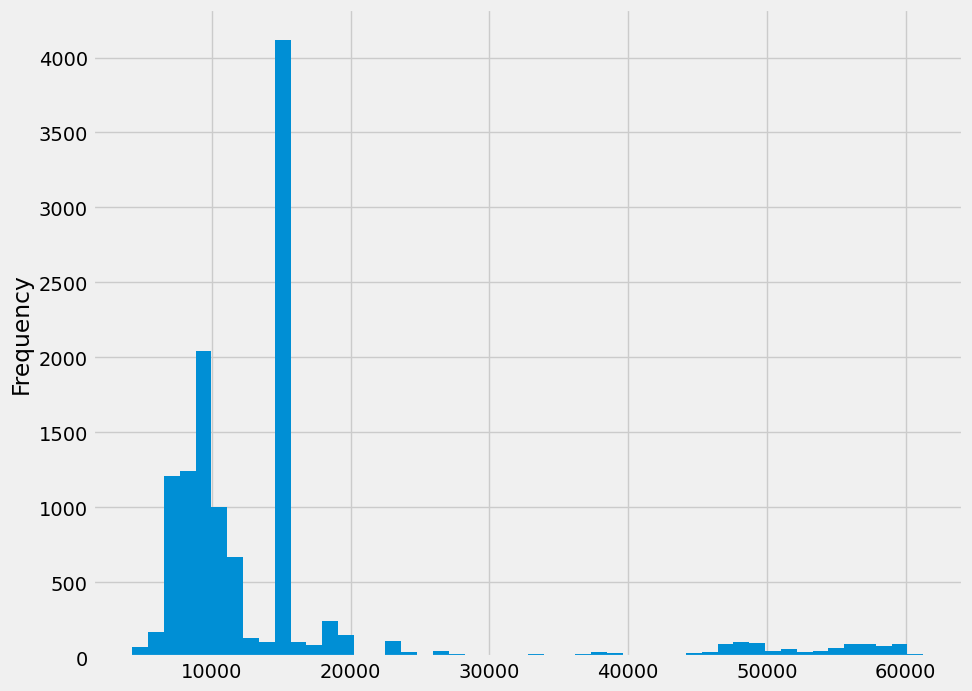

In [25]:
train_ohlc["close"].plot(kind="hist", bins=50, figsize=(10, 8));

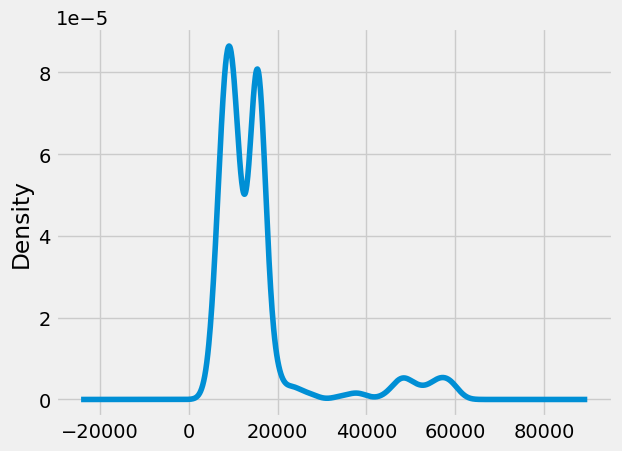

In [26]:
train_ohlc["close"].plot(kind="kde");

### Open

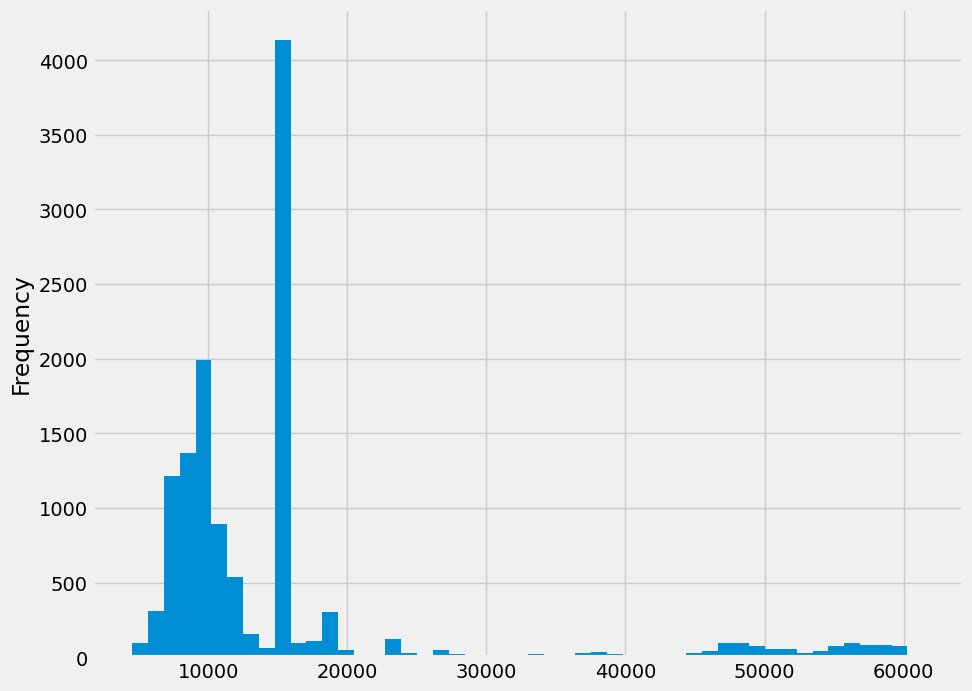

In [27]:
train_ohlc["open"].plot(kind="hist", bins=50, figsize=(10, 8));

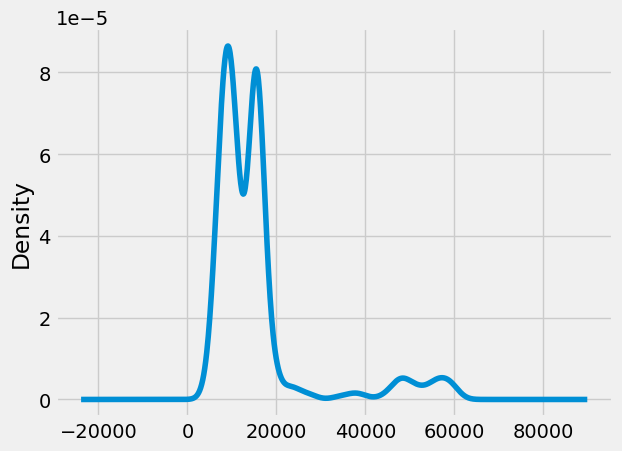

In [28]:
train_ohlc["open"].plot(kind="kde");

### High

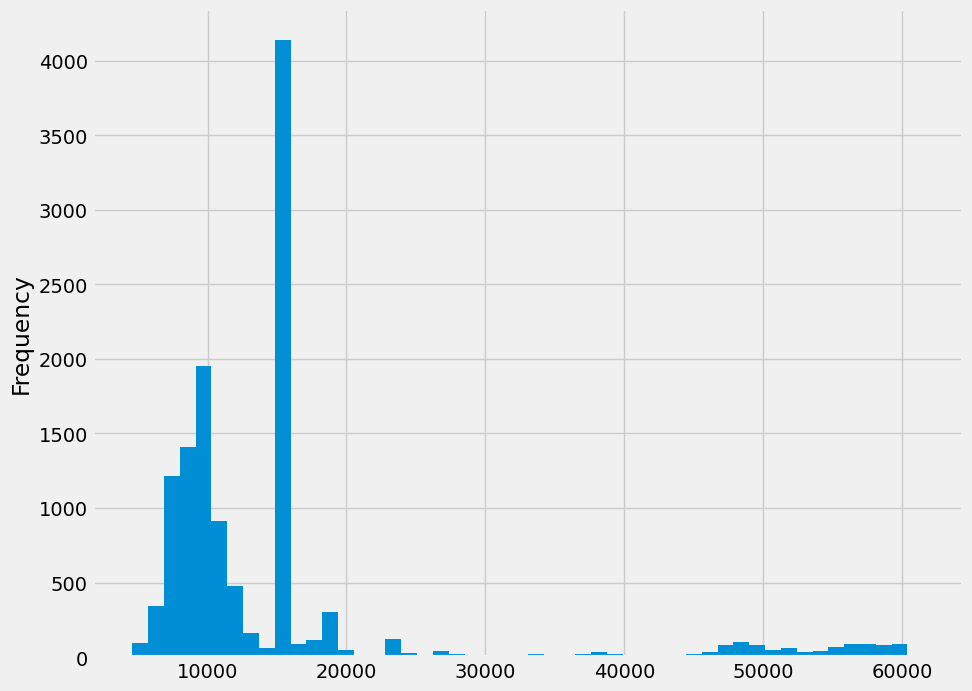

In [29]:
train_ohlc["high"].plot(kind="hist", bins=50, figsize=(10, 8));

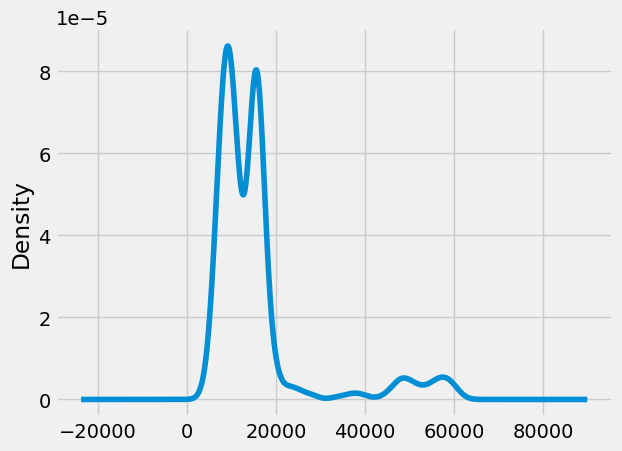

In [30]:
train_ohlc["high"].plot(kind="kde");

### Low

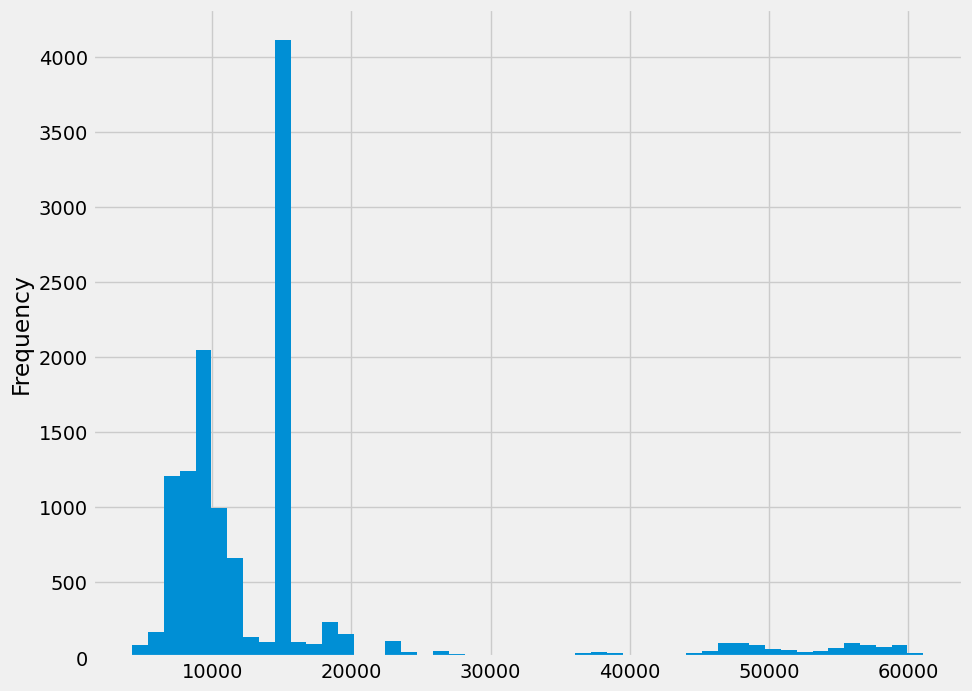

In [31]:
train_ohlc["low"].plot(kind="hist", bins=50, figsize=(10, 8));

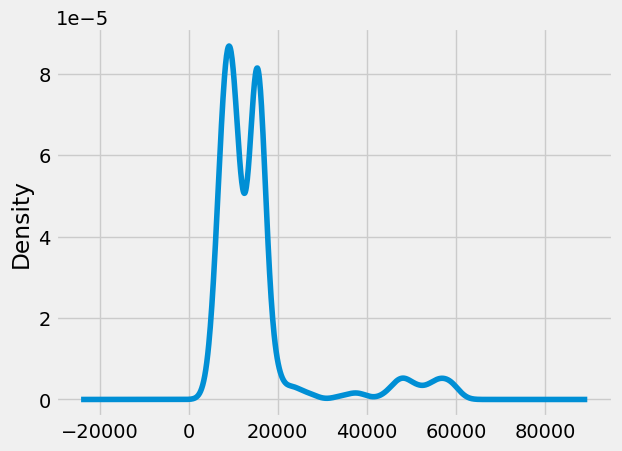

In [32]:
train_ohlc["low"].plot(kind="kde");

### OHLC Chart

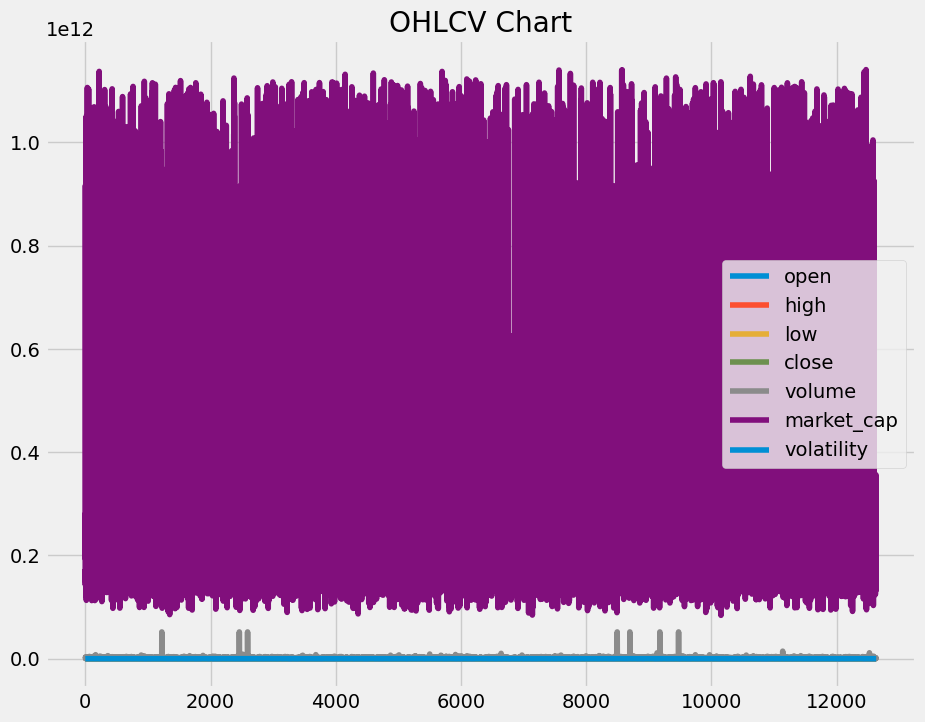

In [33]:
# Plot the ohlcv chart
train_ohlc.plot(figsize=(10, 8), title='OHLCV Chart');

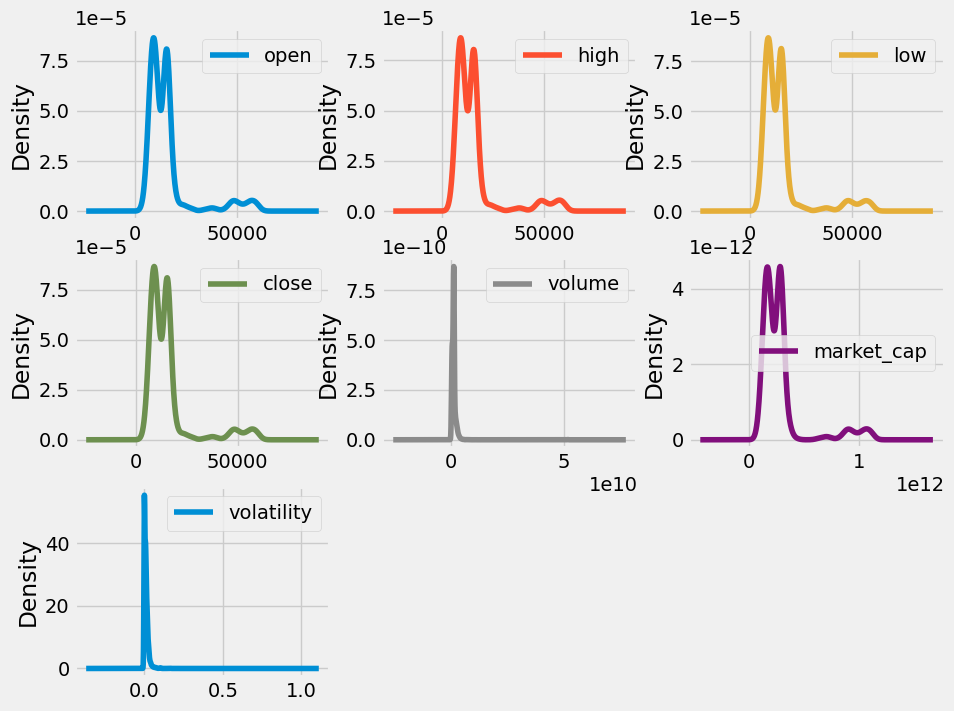

In [34]:
# lmpot of the OHLCV data
train_ohlc.plot(kind='kde', subplots=True, layout=(3,3), sharex=False, figsize=(10, 8));

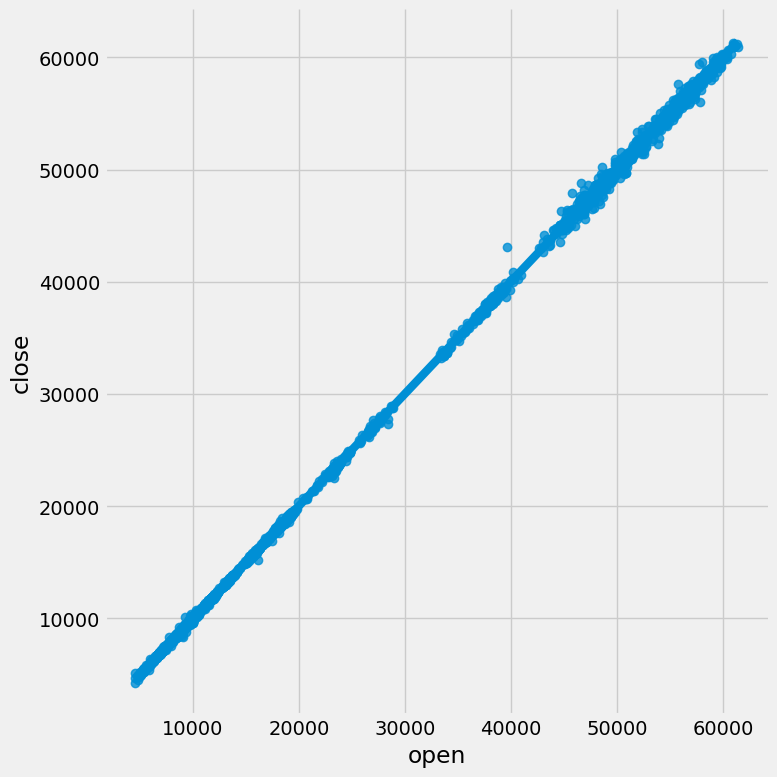

In [35]:
sns.lmplot(x='open', y='close', data=train_ohlc, fit_reg=True, height=8);

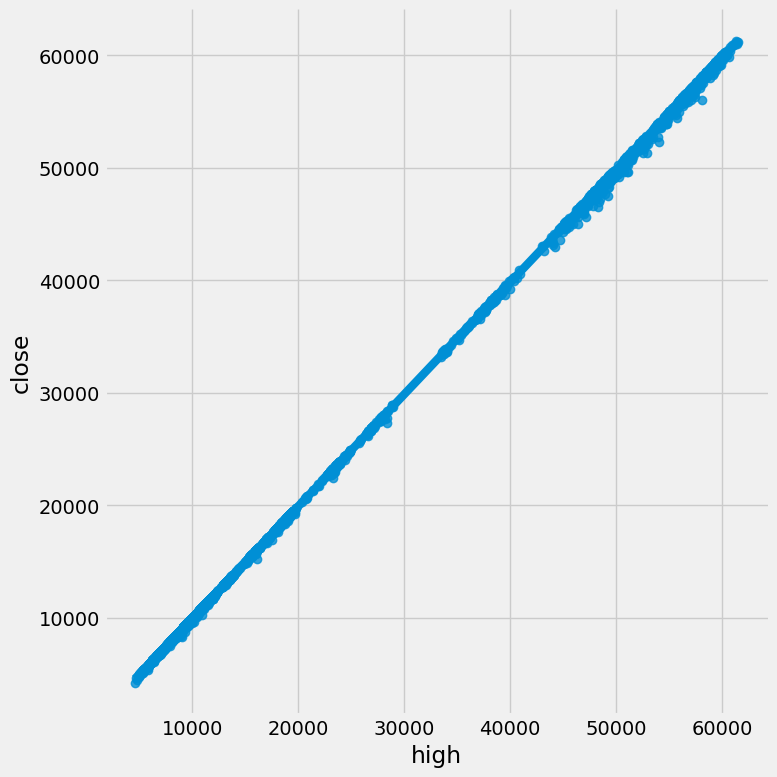

In [36]:
sns.lmplot(x='high', y='close', data=train_ohlc, fit_reg=True, height=8);

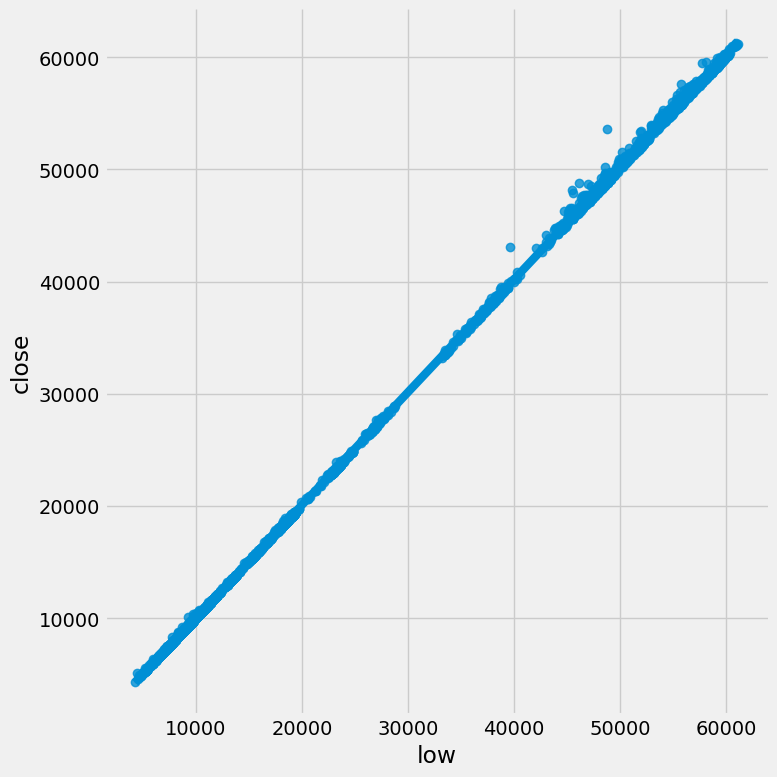

In [37]:
sns.lmplot(x='low', y='close', data=train_ohlc, fit_reg=True, height=8);

## Timeseries Analysis

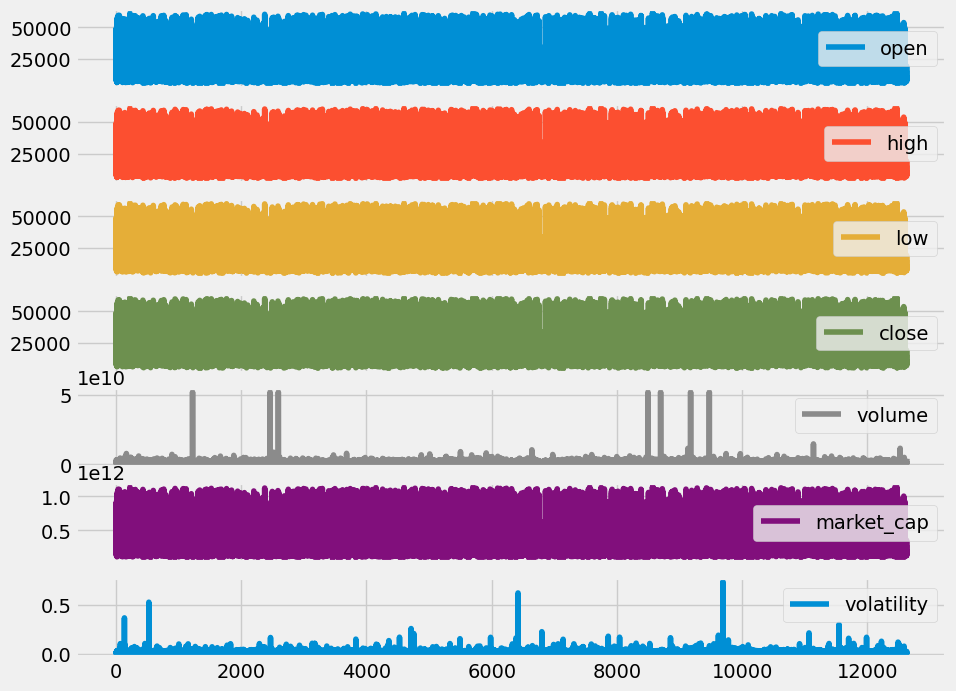

In [38]:
# Time series plot of the OHLCV data
train_ohlc.plot(subplots=True, figsize=(10, 8));

In [39]:
## Augmented Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
def adf_test(series, title=''):
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(), autolag='AIC')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    out = pd.Series(result[0:4], index=labels)
    for key,value in result[4].items():
        out[f'Critical Value ({key})'] = value
    print(out.to_string())  
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
adf_test(train_ohlc['close'], title='Close')

Augmented Dickey-Fuller Test: Close
ADF Test Statistic              -111.278031
p-value                            0.000000
#Lags Used                         0.000000
Number of Observations Used    12631.000000
Critical Value (1%)               -3.430868
Critical Value (5%)               -2.861769
Critical Value (10%)              -2.566892
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


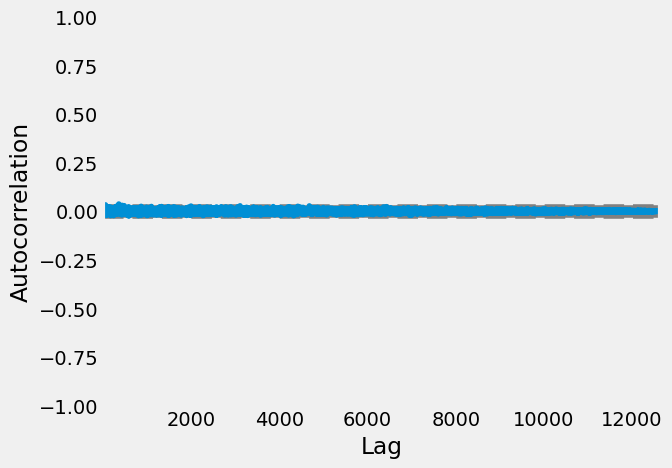

In [40]:
# Plot the autocorrelation plot
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(train_ohlc['close'])
plt.show();

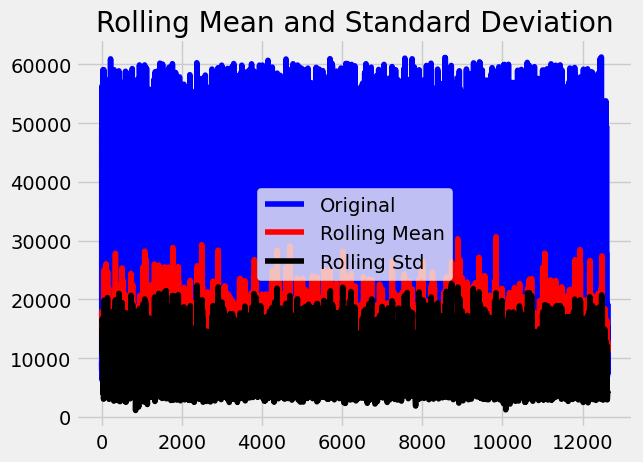

Results of dickey fuller test
Test Statistics                 -111.278031
p-value                            0.000000
No. of lags used                   0.000000
Number of observations used    12631.000000
critical value (1%)               -3.430868
critical value (5%)               -2.861769
critical value (10%)              -2.566892
dtype: float64


In [41]:
# Test for staionarity

def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
test_stationarity(train_ohlc['close'])

<Figure size 640x480 with 0 Axes>

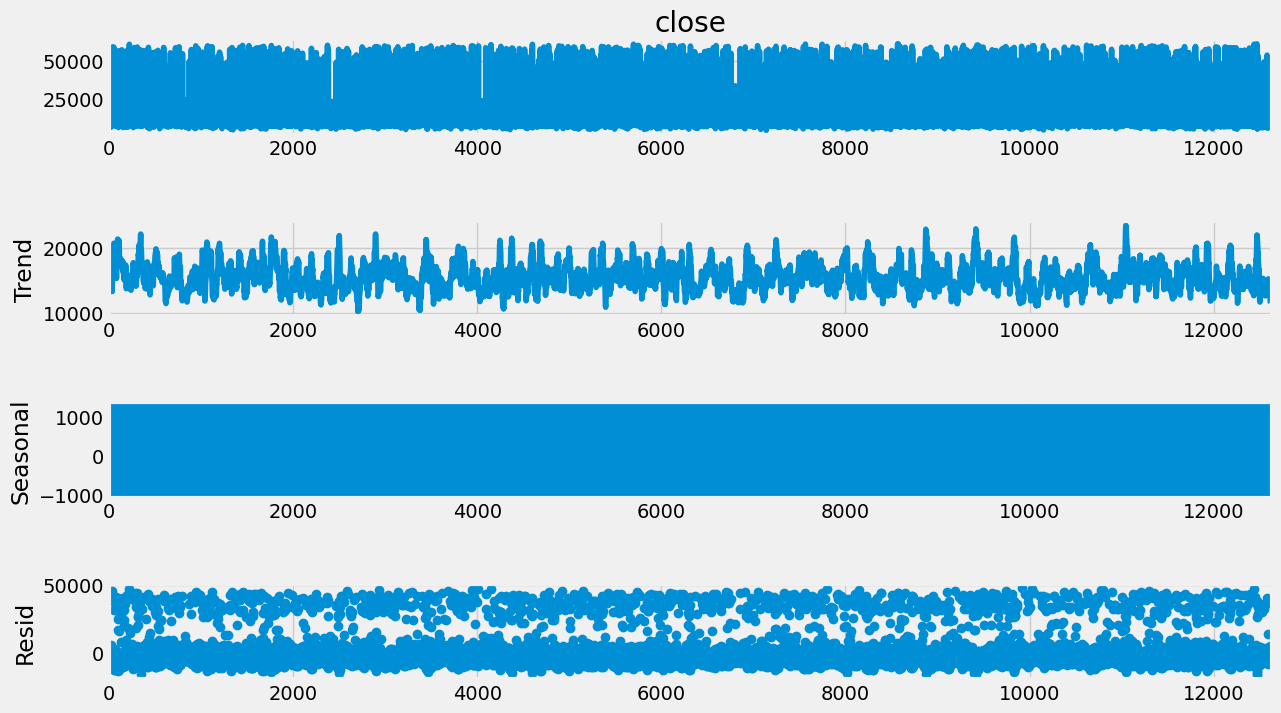

In [42]:
# Decomposing the time series
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(train_ohlc['close'], period=30)
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(15, 8)
plt.show();

## Technical Indicators
* Moving Average

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


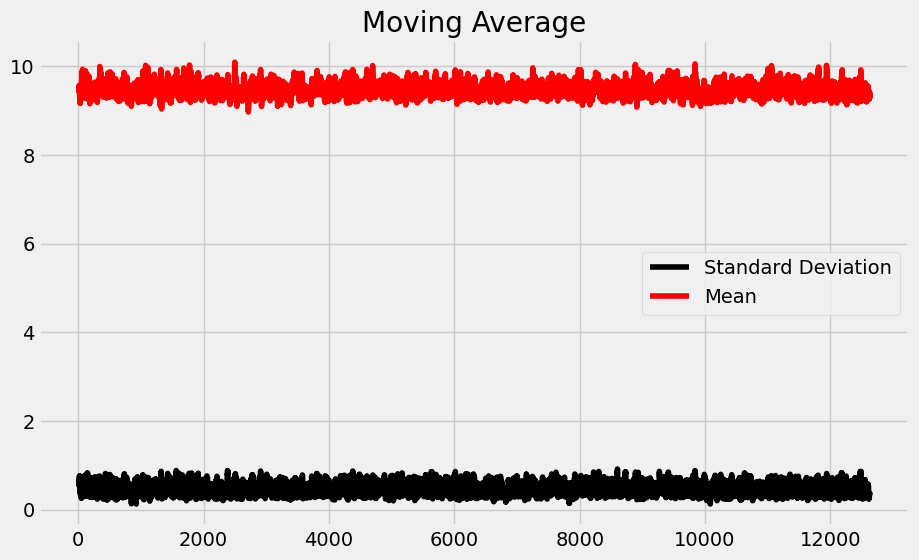

In [44]:
#if not stationary then eliminate trend
#Eliminate trend
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(train_ohlc['close'])
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show();

## Outlier Detection
* The function below is used to detect outliers in the data. The function takes in a dataframe and a column name as input and returns a list of indices of the outliers.


In [45]:
import collections
from collections import Counter
def detect_outliers(df,n,features):
    outlier_indices = []
    for col in features:
        Q1 = np.percentile(df[col],25)
        Q3 = np.percentile(df[col],75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        outlier_indices.extend(outlier_list_col)
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(k for k,v in outlier_indices.items() if v > n)
    return multiple_outliers
detect_outliers(train_ohlc,2,["open","high","low","close"])

[2,
 9,
 15,
 33,
 51,
 53,
 60,
 65,
 66,
 82,
 83,
 97,
 98,
 99,
 106,
 109,
 112,
 113,
 131,
 137,
 138,
 141,
 144,
 163,
 168,
 169,
 172,
 189,
 196,
 209,
 222,
 234,
 251,
 258,
 268,
 279,
 289,
 291,
 309,
 313,
 315,
 321,
 332,
 333,
 339,
 343,
 354,
 356,
 379,
 403,
 424,
 429,
 431,
 440,
 447,
 463,
 466,
 497,
 498,
 499,
 507,
 514,
 531,
 532,
 533,
 539,
 547,
 560,
 562,
 563,
 593,
 595,
 637,
 655,
 668,
 672,
 698,
 723,
 724,
 727,
 736,
 751,
 762,
 763,
 770,
 775,
 799,
 873,
 893,
 895,
 905,
 933,
 943,
 945,
 967,
 990,
 1007,
 1012,
 1020,
 1024,
 1025,
 1027,
 1058,
 1063,
 1070,
 1072,
 1074,
 1099,
 1100,
 1105,
 1108,
 1119,
 1146,
 1174,
 1183,
 1188,
 1190,
 1201,
 1202,
 1211,
 1213,
 1227,
 1233,
 1243,
 1256,
 1280,
 1291,
 1310,
 1312,
 1315,
 1317,
 1337,
 1357,
 1367,
 1384,
 1390,
 1405,
 1414,
 1420,
 1422,
 1425,
 1442,
 1452,
 1455,
 1471,
 1490,
 1519,
 1521,
 1532,
 1540,
 1552,
 1558,
 1560,
 1561,
 1566,
 1578,
 1595,
 1601,
 1603,

## Outlier Removal
* Using the function above, we can remove the outliers from the data.

In [46]:
# Drop outliers
train_ohlc = train_ohlc.drop(detect_outliers(train_ohlc,2,["open","high","low","close"]),axis = 0).reset_index(drop=True)

# 2 here means that if a value is considered as an outlier in 2 or more features, then it will be removed

# Replace NaN values with -999
train_ohlc = train_ohlc.fillna(-999)


## Feature Scaling
* feature scaling is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step.

In [47]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(train_ohlc)

## Preprocessing Test Data

In [48]:
test.head()

,id,asset_id,open,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,reddit_posts_score,reddit_comments,reddit_comments_score,tweets,tweet_spam,tweet_followers,tweet_quotes,tweet_retweets,tweet_replies,tweet_favorites,tweet_sentiment1,tweet_sentiment2,tweet_sentiment3,tweet_sentiment4,tweet_sentiment5,tweet_sentiment_impact1,tweet_sentiment_impact2,tweet_sentiment_impact3,tweet_sentiment_impact4,tweet_sentiment_impact5,social_score,average_sentiment,news,price_score,social_impact_score,correlation_rank,galaxy_score,volatility,market_cap_rank,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,medium,youtube,social_volume,percent_change_24h,market_cap_global
0,ID_323Sn2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,56.0,2.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN
1,ID_325SNW,1,11335.062188,11351.690956,11335.062188,1.064152e+09,2.101463e+11,1664.0,1045.0,64.0,213.0,51.0,274.0,6046.0,3034.0,23453171.0,119.0,2305.0,1367.0,6252.0,151.0,565.0,603.0,4553.0,174.0,2900568.0,1898920.0,2268741.0,14056214.0,2338771.0,23465365.0,3.7,39.0,3.2,3.4,2.8,65.5,0.004407,1.0,711.0,2.0,1.0,1.0,1.0,1.0,7245,-0.555698,3.631052e+11
2,ID_325uzE,1,6322.560756,6328.362354,6294.714484,1.516268e+09,1.153862e+11,397.0,255.0,11.0,72.0,30.0,112.0,2404.0,304.0,3831278.0,12.0,346.0,73.0,604.0,39.0,103.0,668.0,1406.0,188.0,29147.0,411178.0,873284.0,2389256.0,129448.0,3832828.0,3.7,2.0,3.0,3.0,3.4,65.5,0.024035,1.0,715.0,2.0,1.0,1.0,NaN,NaN,2702,1.689370,1.771075e+11
3,ID_328qCx,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,96.0,217.0,244.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225,NaN,NaN
4,ID_3293uJ,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,49.0,33.0,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59,NaN,NaN


In [49]:
test_ohlc = test.copy()
test_ohlc.drop(["asset_id"], axis=1, inplace=True)
test_ohlc = test_ohlc[['open', 'high', 'low', 'volume', 'market_cap', 'volatility']]

In [50]:
# Outlier detection and removal
test_ohlc = test_ohlc.drop(detect_outliers(test_ohlc,2,["open","high","low"]),axis = 0).reset_index(drop=True)

# Fill NaN values with -999
test_ohlc = test_ohlc.fillna(-999)
test_ohlc.head()


,open,high,low,volume,market_cap,volatility
0,-999.000000,-999.000000,-999.000000,-9.990000e+02,-9.990000e+02,-999.000000
1,11335.062188,11351.690956,11335.062188,1.064152e+09,2.101463e+11,0.004407
2,6322.560756,6328.362354,6294.714484,1.516268e+09,1.153862e+11,0.024035
3,-999.000000,-999.000000,-999.000000,-9.990000e+02,-9.990000e+02,-999.000000
4,-999.000000,-999.000000,-999.000000,-9.990000e+02,-9.990000e+02,-999.000000


In [51]:
test_set_scaled = sc.fit_transform(test_ohlc)

# Model Building
* We will use the following models to predict the closing price of the crypto currencies:
* Linear Regression
* Random Forest
* XGBoost
* LSTM

In [52]:
from sklearn.model_selection import train_test_split
X = training_set_scaled
y = train_ohlc['close']
X_train, X_test, y_train, y_test = train_test_split(training_set_scaled, y, test_size = 0.2, random_state = 0)

In [53]:
# How to reduce overfitting
# 1. Get more training data
# 2. Reduce the number of features
# 3. Regularization
# 4. Dropout

#### Baseline

In [54]:
# Linear Regression is our baseline model
# We will use it to compare our other models
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
y_pred

array([ 9985.00038   , 15507.39586712,  7192.640179  , ...,
       10159.484803  , 15507.39586712, 15507.39586712])

In [55]:
# Evaluating the model
rmse = sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

1.6654694193542295e-10


In [56]:
# Accuracy
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

1.0

Text(0.5, 1.0, 'Closing Price Prediction using Linear Regression')

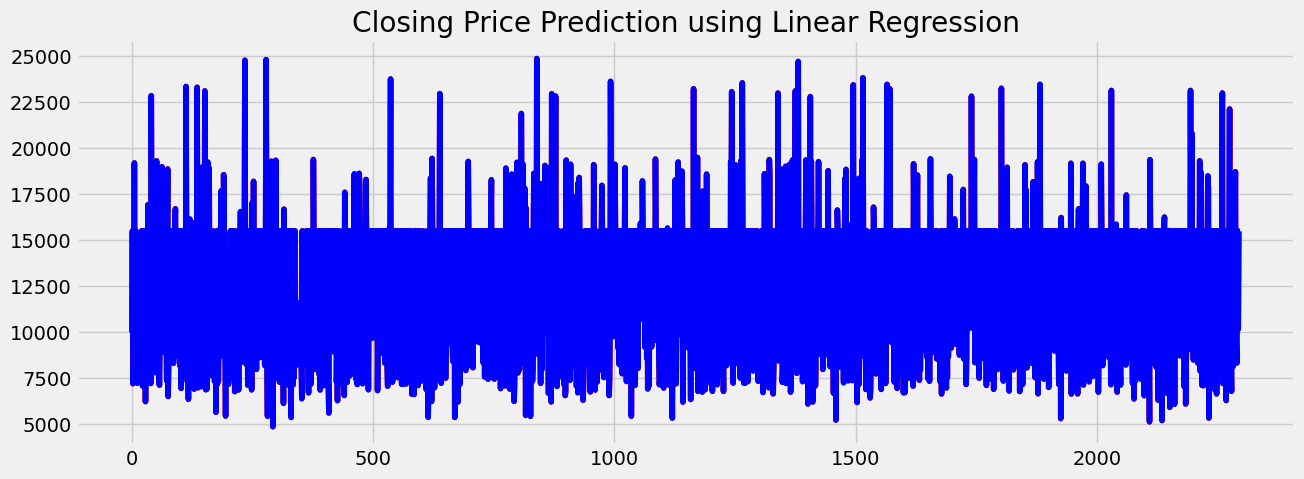

In [57]:
# Visualizing the results
plt.figure(figsize=(14,5))
plt.plot(y_test.values, color = 'red', label = 'Closing Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Closing Price')
plt.legend()
plt.title('Closing Price Prediction using Linear Regression')

### Random Forest

In [58]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
y_pred

array([ 9986.29636908, 15507.39586712,  7192.93264823, ...,
       10159.65945223, 15507.39586712, 15507.39586712])

In [59]:
# Evaluating the model
rmse = sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

8.743842079555852


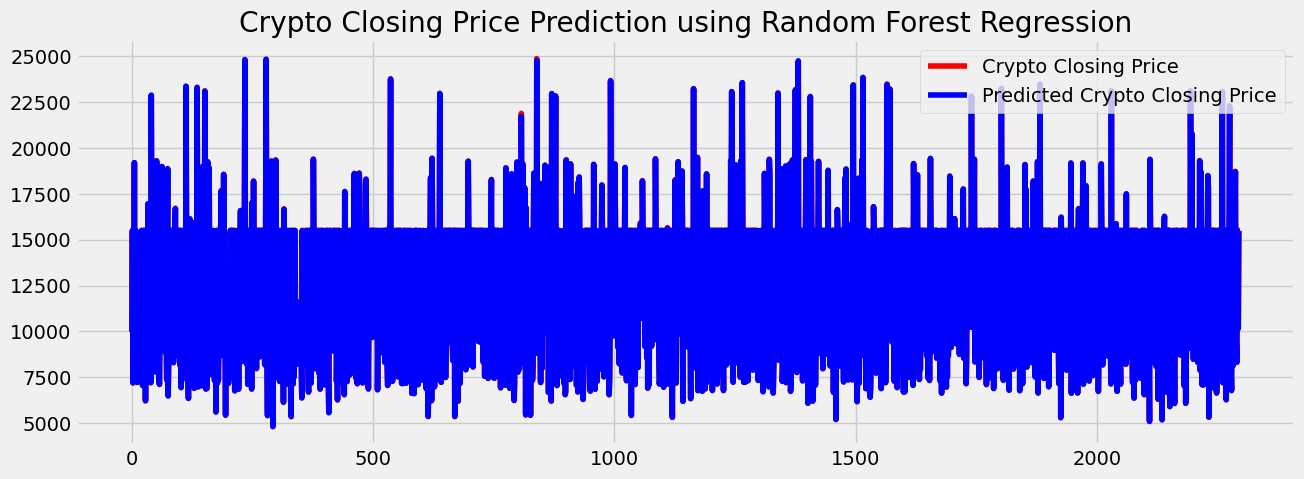

In [60]:
# Visualising the results
plt.figure(figsize=(14,5))
plt.plot(y_test.values, color = 'red', label = 'Crypto Closing Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Crypto Closing Price')
plt.title('Crypto Closing Price Prediction using Random Forest Regression')
plt.legend();

In [61]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))

Accuracy: 100.00 %


### XGBoost

In [62]:
# XGBRegressor
from xgboost import XGBRegressor
xgbregressor = XGBRegressor()
xgbregressor.fit(X_train, y_train)

xgb_y_pred = regressor.predict(X_test)
xgb_y_pred

array([ 9986.29636908, 15507.39586712,  7192.93264823, ...,
       10159.65945223, 15507.39586712, 15507.39586712])

In [63]:
# Evaluating the model
rmse = sqrt(mean_squared_error(y_test, xgb_y_pred))
print(rmse)

8.743842079555852


The performance is very poor. We can try to improve the model by using different models and hyperparameter tuning.

In [64]:
# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators': [100, 200, 300, 400, 500], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]}]
grid_search = GridSearchCV(estimator = xgbregressor,
                            param_grid = parameters,        
                            scoring = 'neg_mean_squared_error',
                            cv = 10,
                            n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

In [65]:
print(f'Best params: {grid_search.best_params_}')
print(f'Best validation score = {grid_search.best_score_}')

Best params: {'max_depth': 7, 'n_estimators': 500}
Best validation score = -512.8815861562231


In [66]:
# Using the best parameters
xgbregressor = XGBRegressor(n_estimators = 500, max_depth = 7)
xgbregressor.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=3, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [67]:
# Evaluating the xgbregressor model
xgb_y_pred = xgbregressor.predict(X_test)
rmse = sqrt(mean_squared_error(y_test, xgb_y_pred))
rmse

22.039669139556203

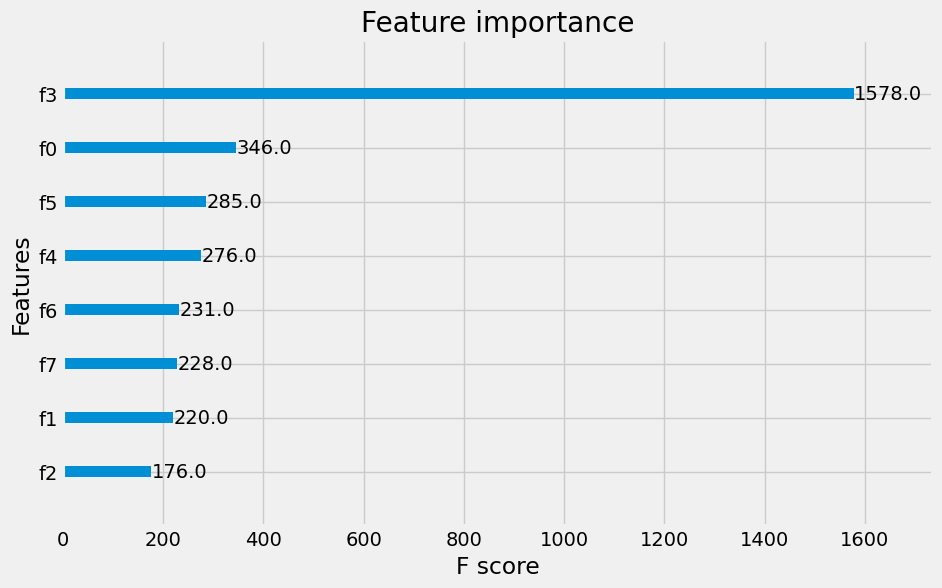

In [68]:
xgb.plot_importance(xgbregressor);

### LSTM Model
- LSTM is a special kind of RNN, capable of learning long-term dependencies. It was introduced by Hochreiter & Schmidhuber (1997), and was refined and popularized by many people in following work. One of the most important papers was by Sepp Hochreiter, Jürgen Schmidhuber. Long Short-Term Memory. Neural Computation 9(8):1735-1780, 1997. The LSTM network or Long Short-Term Memory network is a type of recurrent neural network used in deep learning because very large architectures can be successfully trained. LSTMs are explicitly designed to avoid the long-term dependency problem. They can process the entire sequence of data without any information loss. LSTMs are widely used for time series modelling because having a stateful memory cell makes it a perfect fit for a sequence prediction problem.

* For this model, we will use the following parameters:
    * batch_size = 32
    * epochs = 10
    * loss = mean_squared_error
    * optimizer = adam

2022-12-13 17:20:55.649067: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-13 17:20:55.694594: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-13 17:20:56.716754: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-12-13 17:23:45.152788: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-12-13 17:23:45.177075: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: ca

Epoch 1/100
287/287 [==============================] - 26s 30ms/step - loss: 160265104.0000
Epoch 2/100
287/287 [==============================] - 8s 29ms/step - loss: 159880848.0000
Epoch 3/100
287/287 [==============================] - 7s 26ms/step - loss: 159528784.0000
Epoch 4/100
287/287 [==============================] - 10s 37ms/step - loss: 159182496.0000
Epoch 5/100
287/287 [==============================] - 10s 34ms/step - loss: 158837456.0000
Epoch 6/100
287/287 [==============================] - 11s 39ms/step - loss: 158489632.0000
Epoch 7/100
287/287 [==============================] - 11s 40ms/step - loss: 158151488.0000
Epoch 8/100
287/287 [==============================] - 13s 44ms/step - loss: 157811232.0000
Epoch 9/100
287/287 [==============================] - 13s 44ms/step - loss: 157471680.0000
Epoch 10/100
287/287 [==============================] - 11s 38ms/step - loss: 157128048.0000
Epoch 11/100
287/287 [==============================] - 11s 39ms/step - loss: 156

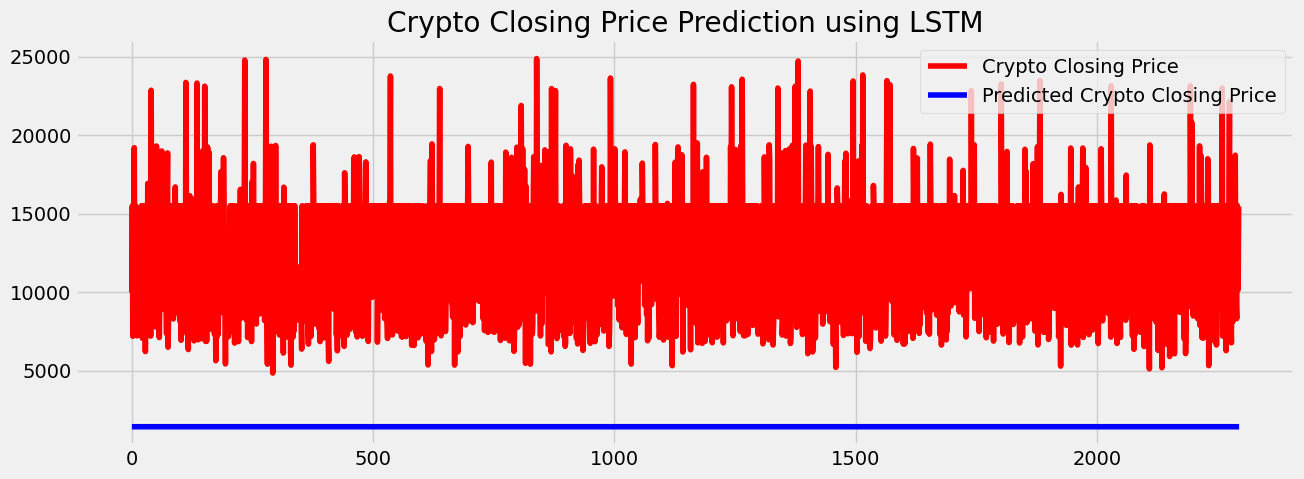

In [69]:
# Reshaping the data
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
lstm_regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
lstm_regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
lstm_regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
lstm_regressor.add(LSTM(units = 50, return_sequences = True))
lstm_regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
lstm_regressor.add(LSTM(units = 50, return_sequences = True))
lstm_regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
lstm_regressor.add(LSTM(units = 50))
lstm_regressor.add(Dropout(0.2))

# Adding the output layer
lstm_regressor.add(Dense(units = 1))

# Compiling the RNN
lstm_regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
lstm_regressor.fit(X_train, y_train, epochs = 10, batch_size = 32)

# Making the predictions and visualising the results
lstm_y_pred = lstm_regressor.predict(X_test)
print(lstm_y_pred)

# Evaluating the model
rmse = sqrt(mean_squared_error(y_test, lstm_y_pred))
print(rmse)

# Visualising the results
plt.figure(figsize=(14,5))
plt.plot(y_test.values, color = 'red', label = 'Crypto Closing Price')
plt.plot(lstm_y_pred, color = 'blue', label = 'Predicted Crypto Closing Price')
plt.title('Crypto Closing Price Prediction using LSTM')
plt.legend();

##### NOTE: We used 4 layers of LSTM with 50 neurons each and 0.2 dropout rate. We also used 10 epochs and a batch size of 32. We can tune these parameters to get better results.

### BONUS: ARIMA Model
* ARIMA is a statistical model that is used for time series forecasting. It is a generalization of the simpler AutoRegressive Moving Average model. It is a combination of two models: AR and MA. ARIMA stands for AutoRegressive Integrated Moving Average. The ARIMA forecasting for a stationary time series is nothing but a linear (like a linear regression) equation. The predictors depend on the parameters (p,d,q) of the ARIMA model:


/home/ashioyajotham/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/home/ashioyajotham/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/home/ashioyajotham/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



178870.66796106854
3897.8583431139073


/home/ashioyajotham/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



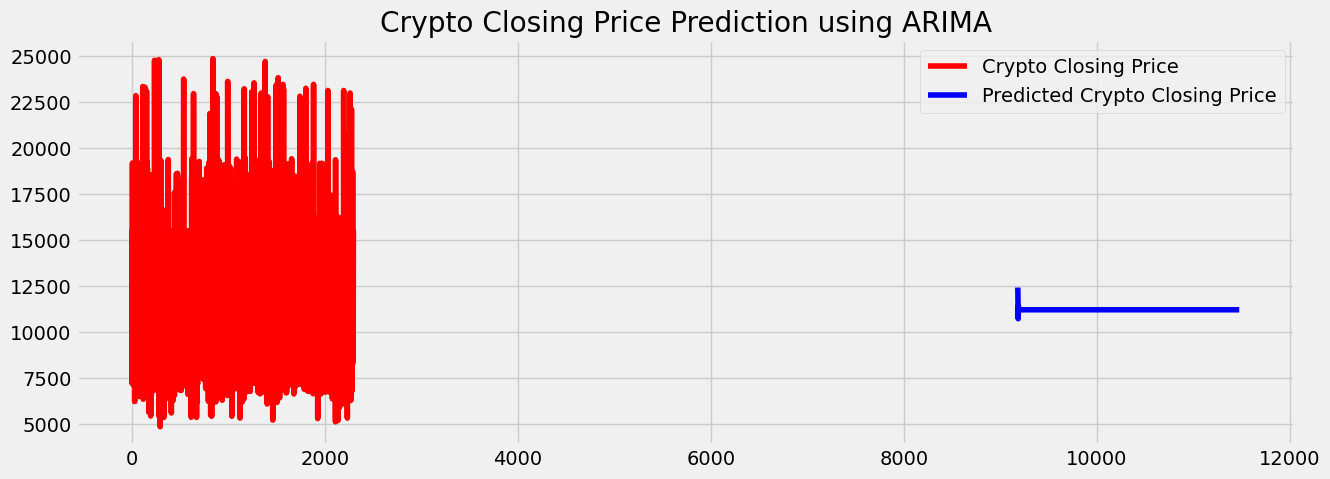

In [73]:
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

arima_model = ARIMA(y_train, order=(5,1,0))
arima_model_fit = arima_model.fit()
print(arima_model_fit.aic)

# Forecast
arima_y_pred = arima_model_fit.forecast(steps=len(y_test))
arima_y_pred

# Evaluating the model
rmse = sqrt(mean_squared_error(y_test, arima_y_pred))
print(rmse)

# Visualising the results
plt.figure(figsize=(14,5))
plt.plot(y_test.values, color = 'red', label = 'Crypto Closing Price')
plt.plot(arima_y_pred, color = 'blue', label = 'Predicted Crypto Closing Price')
plt.title('Crypto Closing Price Prediction using ARIMA')
plt.legend();